<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

<center><font size=10>Artificial Intelligence and Machine Learning</font></center>
<center><font size=6>Advanced Machine Learning - Project Debrief</font></center>

<center><img src="https://images.pexels.com/photos/7235894/pexels-photo-7235894.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=2" width="800" height="500"></center>

<center><font size=6>Visa Approval Facilitation</font></center>

## Problem Statement

### Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

### Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired the firm EasyVisa for data-driven solutions. You as a data  scientist at EasyVisa have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.

### Data Description

The data contains the different attributes of employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 scikit-learn==1.5.2 matplotlib==3.7.1 seaborn==0.13.1 xgboost==2.0.3 -q --user
# !pip install imblearn  --user


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the below.*

In [ ]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score


# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import RandomizedSearchCV
from sklearn import tree

## Import Dataset

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

visa = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ML Case Study Projects/EasyVisa/EasyVisa-2.csv') ##  Fill the blank to read the data

In [ ]:
# copying data to another variable to avoid any changes to original data
data = visa.copy()

## Overview of the Dataset

#### View the first and last 5 rows of the dataset

In [ ]:
data.head() ##  Complete the code to view top 5 rows of the data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [ ]:
data.tail() ##  Complete the code to view last 5 rows of the data

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


#### Understand the shape of the dataset

In [ ]:
data.shape ##  Complete the code to view dimensions of the data

(25480, 12)

* The dataset has 25480 rows and 12 columns

#### Check the data types of the columns for the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


In [ ]:
#place dtypes in data frame and label columns
dtypes = pd.DataFrame(data.dtypes, columns=['dtypes'])
dtypes

,dtypes
case_id,object
continent,object
education_of_employee,object
has_job_experience,object
requires_job_training,object
no_of_employees,int64
yr_of_estab,int64
region_of_employment,object
prevailing_wage,float64
unit_of_wage,object


In [ ]:
# checking for duplicate values
data.duplicated().sum() ##  Complete the code to check duplicate entries in the data

np.int64(0)

In [ ]:
data.isna().sum() ##  Complete the code to check missing values in the data

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


In [ ]:
from scipy.stats import zscore
outliers = pd.DataFrame()
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
outliers[numeric_columns] = data[numeric_columns].apply(zscore)


In [ ]:
outliers.head(15)

,no_of_employees,yr_of_estab,prevailing_wage
0,0.386667,0.651230,-1.398537
1,-0.142282,0.533211,0.169835
2,1.694984,0.674834,0.919079
3,-0.243429,-1.945186,0.169994
4,-0.200417,0.604022,1.428604
5,-0.145472,0.769249,0.071880
6,-0.029813,0.344381,-0.394215
7,-0.115050,-1.307884,-1.401831
8,-0.037462,0.769249,-0.001773
9,-0.149319,0.367985,-0.131422


## Exploratory Data Analysis (EDA)

#### Let's check the statistical summary of the data

Observation: <br>
The average number of employees a company have is 5667<br>
The largest number of employees a company have  is 602069 employees<br>
The earliest company was started in 1979, with the youngest company started in 2016<br>
The average salary is 74455 with the maximum salary 319210


In [ ]:
data.describe().T ##  Complete the code to print the statistical summary of the data

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


#### Fixing the negative values in number of employees columns

In [ ]:
# Complete the code to check negative values in the employee column
# Group by contient and provide count of each
data[data['no_of_employees'] < 0].groupby(data['continent']).count()
# data[data['no_of_employees'] < 0].groupby(data['continent']).sum() ## Complete the code to check negative values in the employee column

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
continent,,,,,,,,,,,,
Africa,1,1,1,1,1,1,1,1,1,1,1,1
Asia,21,21,21,21,21,21,21,21,21,21,21,21
Europe,5,5,5,5,5,5,5,5,5,5,5,5
North America,5,5,5,5,5,5,5,5,5,5,5,5
South America,1,1,1,1,1,1,1,1,1,1,1,1


In [ ]:
data['no_of_employees'].shape ## Complete the code to check negative values in the employee column

(25480,)

In [ ]:
# taking the absolute values for number of employees
data["no_of_employees"] = data["no_of_employees"].apply(lambda x: abs(x)) ## Write the function to convert the values to a positive number

In [ ]:
data[data['no_of_employees'] < 0].value_counts() ## Complete the code to check negative values in the employee column

,,,,,,,,,,,,0
case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status,


#### Let's check the count of each unique category in each of the categorical variables

In [ ]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

EZYV25480    1
EZYV01       1
EZYV02       1
EZYV03       1
EZYV04       1
            ..
EZYV12       1
EZYV13       1
EZYV14       1
EZYV15       1
EZYV16       1
Name: case_id, Length: 25480, dtype: int64
--------------------------------------------------
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
--------------------------------------------------
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
--------------------------------------------------
Y    14802
N    10678
Name: has_job_experience, dtype: int64
--------------------------------------------------
N    22525
Y     2955
Name: requires_job_training, dtype: int64
--------------------------------------------------
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, 

In [ ]:
# checking the number of unique values
data["case_id"].value_counts() ## Complete the code to check unique values in the mentioned column

,case_id
EZYV25480,1
EZYV01,1
EZYV02,1
EZYV03,1
EZYV04,1
...,...
EZYV12,1
EZYV13,1
EZYV14,1
EZYV15,1


In [ ]:
data.drop(["case_id"], axis=1, inplace=True) ## Complete the code to drop 'case_id' column from the data

### Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on education of employee

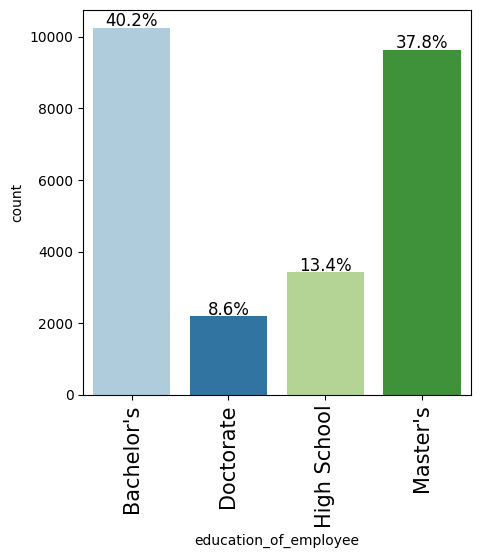

In [ ]:
labeled_barplot(data, "education_of_employee", perc=True)

**Observation**: The chart illustrates the distribution of education levels among employees, highlighting the percentages of applicants with varying degrees. The largest group comprises individuals with Bachelor's degrees (40.2%), followed by those with Master's degrees (37.8%). In contrast, the proportions for Doctorate holders (8.6%) and employees with only High School diplomas (13.4%) are significantly lower.

This data provides insight into the educational composition of the workforce. In the context of the Immigration and Nationality Act (INA), it underscores the importance of higher education qualifications among foreign workers seeking employment in the United States. Since the INA often prioritizes skilled labor, the prevalence of Bachelor's and Master's degrees among applicants suggests alignment with the act’s focus on attracting individuals with specialized or advanced skills.

#### Observations on region of employment

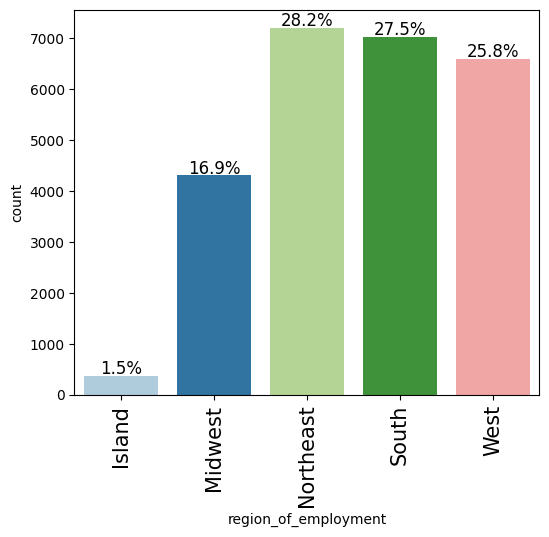

In [ ]:
labeled_barplot(data, 'region_of_employment', perc=True)  ## Complete the code to create labeled_barplot for region of employment

**Observation** The graph highlights the distribution of employment regions for applicants entering the United States. Here's the analysis:

The Northeast region leads with the highest percentage of employment at 28.2%, indicating a significant concentration of job opportunities in this area.

The South and West regions follow closely, with 27.5% and 25.8% of applicants finding employment there, respectively. These regions also represent major hubs for economic activity and job availability.

The Midwest accounts for 16.9%, showing a moderate level of employment opportunities for applicants.

The Island region has the lowest percentage, at just 1.5%, suggesting limited job prospects in this area.

This distribution reflects the varying economic landscapes and job markets across the United States. The dominance of the Northeast, South, and West regions aligns with their larger urban centers and diverse industries, which attract a significant portion of foreign workers. Meanwhile, the lower percentages in the Midwest and Island regions may indicate fewer opportunities or a smaller demand for foreign labor.

#### Observations on job experience

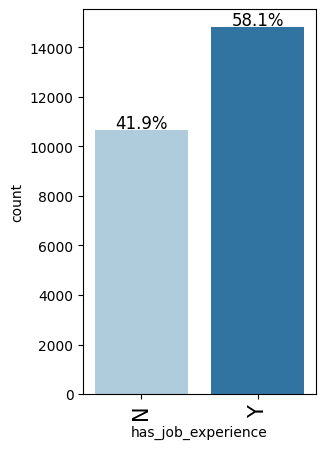

In [ ]:
labeled_barplot(data,'has_job_experience', perc=True) ## Complete the code to create labeled_barplot for job experience

**Observation**<br>
The graph illustrates the distribution of applicants based on their job experience:

58.1% of applicants have prior job experience (labeled as "Y"), making them the majority.

41.9% of applicants lack job experience (labeled as "N"), representing a significant portion but still less than those with experience.

This data highlights that a substantial number of applicants entering the U.S. workforce under the Immigration and Nationality Act (INA) bring prior job experience, which could make them more competitive in the job market. However, the notable percentage of applicants without experience suggests opportunities for entry-level roles or training programs to integrate these individuals into the workforce effectively.

#### Observations on case status

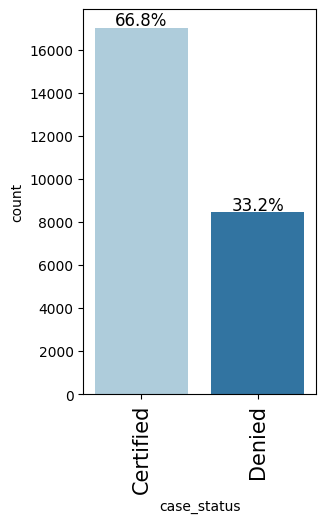

In [ ]:
labeled_barplot(data, 'case_status', perc=True) ## Complete the code to create labeled_barplot for case status

**Observation:**
The graph reflects visa application outcomes for foreign workers entering the U.S. workforce, as governed by the Immigration and Nationality Act (INA). The case status outcomes—certified (66.8%) and denied (33.2%)—highlight the rigorous selection process aimed at ensuring that applicants meet specific qualifications and standards set forth by U.S. immigration policies.

Under the INA, foreign workers typically apply for visas based on employment needs, such as high-demand skills or specialized expertise. The certification rate demonstrates the act's effectiveness in allowing skilled professionals to join the U.S. workforce, which helps fill critical labor gaps and contributes to economic growth. Conversely, the denial rate reflects the act’s enforcement of stringent eligibility requirements, ensuring that only qualified candidates are approved to enter the workforce. These standards help uphold fair competition and protect domestic workers.

This data underlines the balance maintained by the INA between supporting the U.S. economy with foreign talent and safeguarding the integrity of the labor market. The relatively high percentage of certifications showcases the role of foreign labor in addressing industry demands, while the denials underscore the importance of adherence to legal and professional criteria.

### Bivariate Analysis

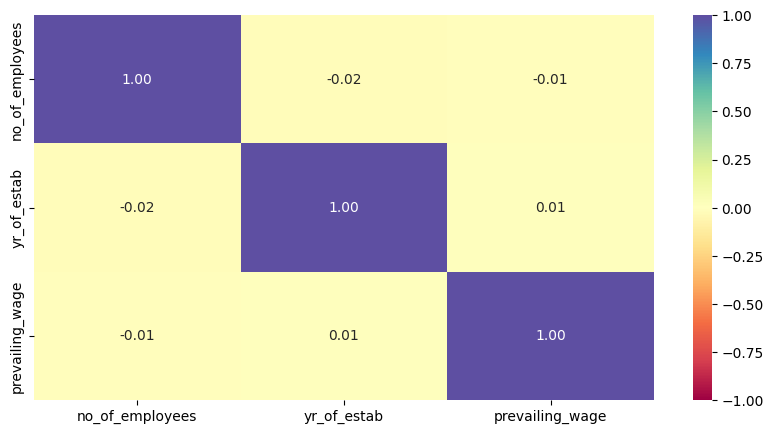

In [ ]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(10, 5))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
) ## Complete the code to find the correlation between the variables
plt.show()

**Observation**
Certainly! Here's a more refined analysis of the heatmap for your report, tailored to the context of the U.S. workforce under the Immigration and Nationality Act (INA):

---

### Analysis of Correlations in the Context of the INA

The correlation heatmap provides valuable insights into the relationships between the **number of employees**, **year established**, and **prevailing wage** for organizations employing foreign workers under the Immigration and Nationality Act (INA). The findings are as follows:

1. **Number of Employees vs. Year Established**:
   - The correlation coefficient of **-0.02** indicates a negligible negative relationship. This suggests that the size of an organization’s workforce is largely independent of its year of establishment. Whether a company is newly formed or has been in existence for decades, it does not significantly influence the number of employees hired. This aligns with the INA's framework, which focuses on job roles and market needs rather than organizational history.

2. **Number of Employees vs. Prevailing Wage**:
   - The correlation coefficient of **-0.01** reflects a minimal negative relationship between workforce size and prevailing wage. This finding highlights that organizations, irrespective of their size, adhere to prevailing wage standards mandated by U.S. labor laws. The INA's emphasis on fair compensation ensures that wages are determined by industry norms and job requirements, rather than being influenced by the employer's scale of operations.

3. **Year Established vs. Prevailing Wage**:
   - A weak positive correlation of **0.01** suggests that an organization’s age has little to no bearing on the wages it offers. This indicates that both older and newer companies comply equally with prevailing wage requirements, reflecting the INA's role in promoting fairness and consistency across the labor market.

### Contextual Relevance to the U.S. Workforce:
These negligible correlations emphasize the impartiality of the INA's employment provisions. They reveal that factors like the size or age of an organization play a minimal role in determining employment opportunities or wages for foreign workers. Instead, the INA prioritizes other criteria, such as job qualifications, industry needs, and regional demands, to uphold equitable access to the U.S. workforce.

This analysis underscores how the INA supports a balanced labor market, ensuring that foreign workers are integrated based on skill and merit while fostering economic stability across diverse organizational types.

---

Let me know if this works for your report or if you’d like me to adjust it further!

**Creating functions that will help us with further analysis.**

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

#### Those with higher education may want to travel abroad for a well-paid job. Let's find out if education has any impact on visa certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


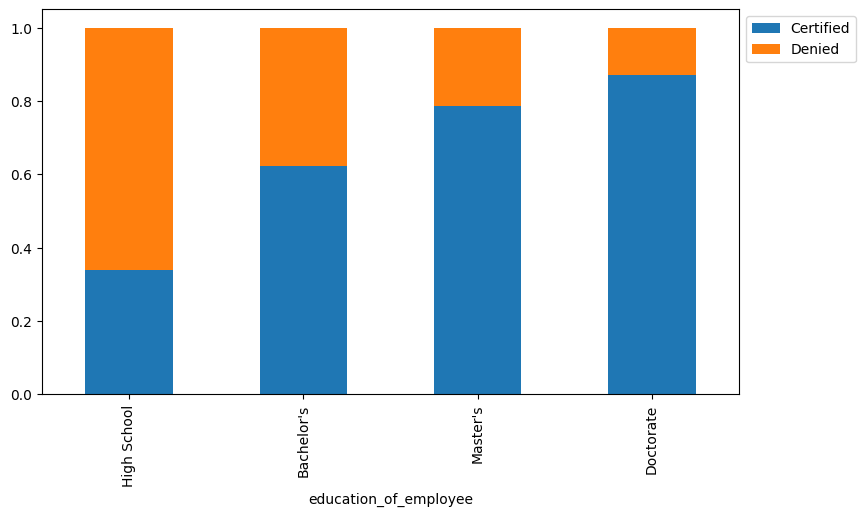

In [ ]:
stacked_barplot(data, "education_of_employee", "case_status")

Observation:
Analysis of Education Level and Certification Status under INA
The graph and table together reveal how the level of education influences the certification and denial rates of visa applications under the U.S. Immigration and Nationality Act (INA).

Overall Overview:

Out of 25,480 applicants, 17,018 cases were certified (approximately 66.8%), while 8,462 cases were denied (approximately 33.2%). This indicates that a majority of applicants are certified.

High School Education:

A total of 3,420 applicants held only a high school diploma. Of these, 1,164 (34%) were certified, while 2,256 (66%) were denied.

This shows that applicants with a high school diploma face the highest denial rate, reflecting how lower education levels may not meet the requirements under INA’s employment standards.

Bachelor's Degrees:

10,234 applicants held a bachelor's degree. Among them, 6,367 (62%) were certified, and 3,867 (38%) were denied.

This suggests a moderate certification rate for bachelor’s degree holders, with a noticeable increase in opportunities compared to high school diploma holders.

Master's Degrees:

Of the 9,634 applicants with a master’s degree, 7,575 (79%) were certified, while 2,059 (21%) were denied.

This data highlights a significant improvement in certification rates for individuals with advanced education, reflecting the INA’s emphasis on attracting highly skilled workers.

Doctorate Degrees:

Out of 2,192 applicants with a doctorate, 1,912 (87%) were certified, and only 280 (13%) were denied.

Applicants with a doctorate demonstrate the highest certification rate, showcasing how the INA prioritizes individuals with the highest level of expertise and education.

Key Observations:
Certification rates increase with higher levels of education, showcasing a clear preference for highly educated applicants under the INA.

Denial rates are inversely proportional to education levels, with high school diploma holders facing the greatest challenges, while doctorate holders enjoy the most success.

This analysis underscores the pivotal role of education in the visa certification process, aligning with the INA’s objective of building a highly skilled workforce to meet U.S. labor market demands.

#### Lets' similarly check for the continents and find out how the visa status vary across different continents.

In [ ]:
# Complete the code to plot stacked barplot for region of continent and case status


case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


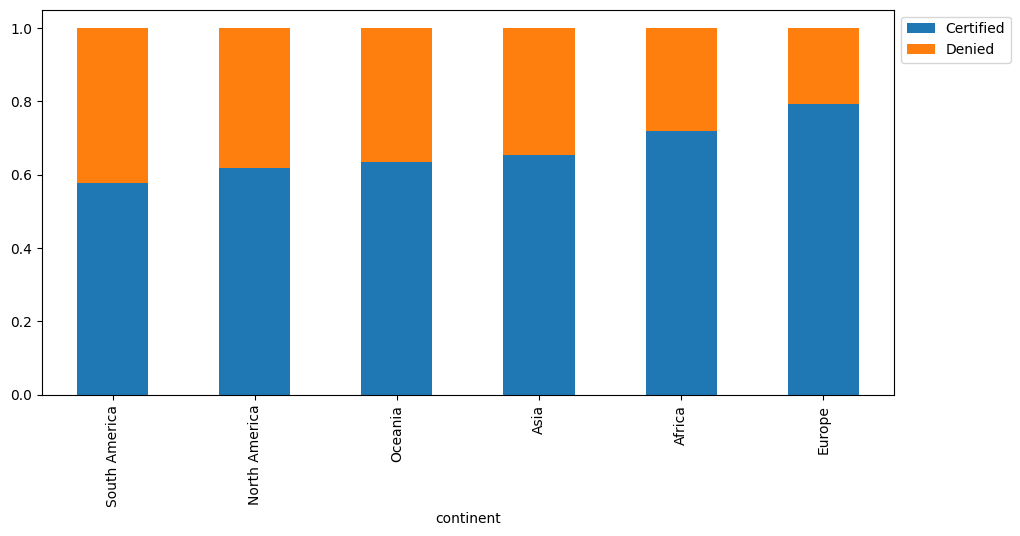

In [ ]:
stacked_barplot(data, 'continent', 'case_status') ## Complete the code to plot stacked barplot for region of continent and case status

**Observation**
Analysis of Case Status by Continent under the INA
The graph, combined with the table, provides insights into the certification and denial rates of visa applications for foreign workers from various continents under the Immigration and Nationality Act (INA).

Asia:

Certified: 11,012 (65.4%)

Denied: 5,849 (34.6%)

Asia has the highest number of applications, with a majority successfully certified. This reflects the significant contribution of highly skilled workers from Asia to the U.S. workforce, aligning with the INA's focus on attracting skilled labor.

North America:

Certified: 2,037 (61.9%)

Denied: 1,255 (38.1%)

Applicants from North America exhibit a lower certification rate compared to Asia but still maintain a majority of approved cases. The proximity and economic ties may influence this region's contribution to U.S. employment needs.

Europe:

Certified: 2,957 (79.2%)

Denied: 775 (20.8%)

Europe shows the highest certification rate across all continents, suggesting that applicants from this region often meet or exceed the INA’s requirements for employment visas.

South America:

Certified: 493 (57.9%)

Denied: 359 (42.1%)

While the certification rate remains a majority, the relatively balanced distribution indicates challenges faced by South American applicants in fulfilling INA criteria.

Africa:

Certified: 397 (72%)

Denied: 154 (28%)

Africa’s certification rate is relatively high, showcasing the ability of applicants from this continent to meet the INA’s standards despite having a smaller overall number of applications.

Oceania:

Certified: 122 (63.5%)

Denied: 70 (36.5%)

Oceania has the lowest number of applications overall but shows a solid certification rate, demonstrating compliance with INA requirements among its applicants.

Key Observations:
Certification Trends: Europe leads with the highest certification rate (79.2%), followed by Africa (72%), highlighting the regions with the most success under INA guidelines.

Denial Trends: South America has the highest proportion of denied applications (42.1%), suggesting possible challenges in meeting the standards set for visa approval.

Overall Patterns: Asia dominates in terms of total applications, reflecting its significant role in supplying skilled labor to the U.S. workforce.

This analysis underscores how certification rates vary by continent, reflecting the INA's commitment to evaluating and approving applicants based on their qualifications and the specific needs of the U.S. labor market

#### Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Let's see if having work experience has any influence over visa certification

has_job_experience      N      Y    All
case_status                            
All                 10678  14802  25480
Certified            5994  11024  17018
Denied               4684   3778   8462
------------------------------------------------------------------------------------------------------------------------


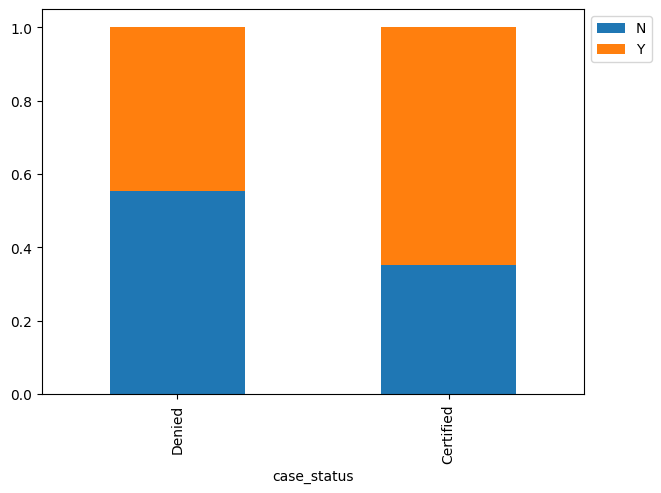

In [ ]:
stacked_barplot(data, 'case_status', 'has_job_experience') ## Complete the code to plot stacked barplot for region of case_status and has_job_experience

**Observation**
Analysis of **Case Status by Job Experience **under the INA
The graph and table together illustrate how job experience influences the outcomes of visa applications under the Immigration and Nationality Act (INA). Here's a detailed analysis:

1. Overall Distribution:
Out of 25,480 total cases, the majority (14,802, 58%) involve applicants with job experience (Y), while 10,678 (42%) involve applicants without job experience (N).

This indicates a strong representation of experienced workers in the applicant pool.

2. Certification Rates:
Applicants with job experience (Y):

Certified: 11,024 (74.5% of cases with job experience).

Denied: 3,778 (25.5% of cases with job experience).

The high certification rate suggests that prior job experience significantly boosts the likelihood of visa approval.

Applicants without job experience (N):

Certified: 5,994 (56.1% of cases without job experience).

Denied: 4,684 (43.9% of cases without job experience).

The lower certification rate and higher denial rate for this group reflect the challenges faced by applicants without prior work experience in meeting INA requirements.

3. Comparative Insights:
Job experience plays a critical role in the certification process. Applicants with experience are over 18 percentage points more likely to have their applications certified than those without experience.

Conversely, applicants without job experience face a significantly higher risk of denial (nearly 44%) compared to their experienced counterparts (25.5%).

4. Contextual Relevance to the INA:
The INA prioritizes skilled labor to address U.S. workforce needs, which is evident in the higher certification rates for experienced applicants. This trend underscores the value placed on work experience as a key qualification for visa approval. For applicants without job experience, the higher denial rate emphasizes the competitive nature of the selection process, likely reflecting the preference for candidates who bring immediate, demonstrable value to the labor market.

This analysis highlights the INA's role in shaping a highly skilled workforce by favoring applicants with prior professional experience. Let me know if you'd like further refinements!

#### Checking if the prevailing wage is similar across all the regions of the US

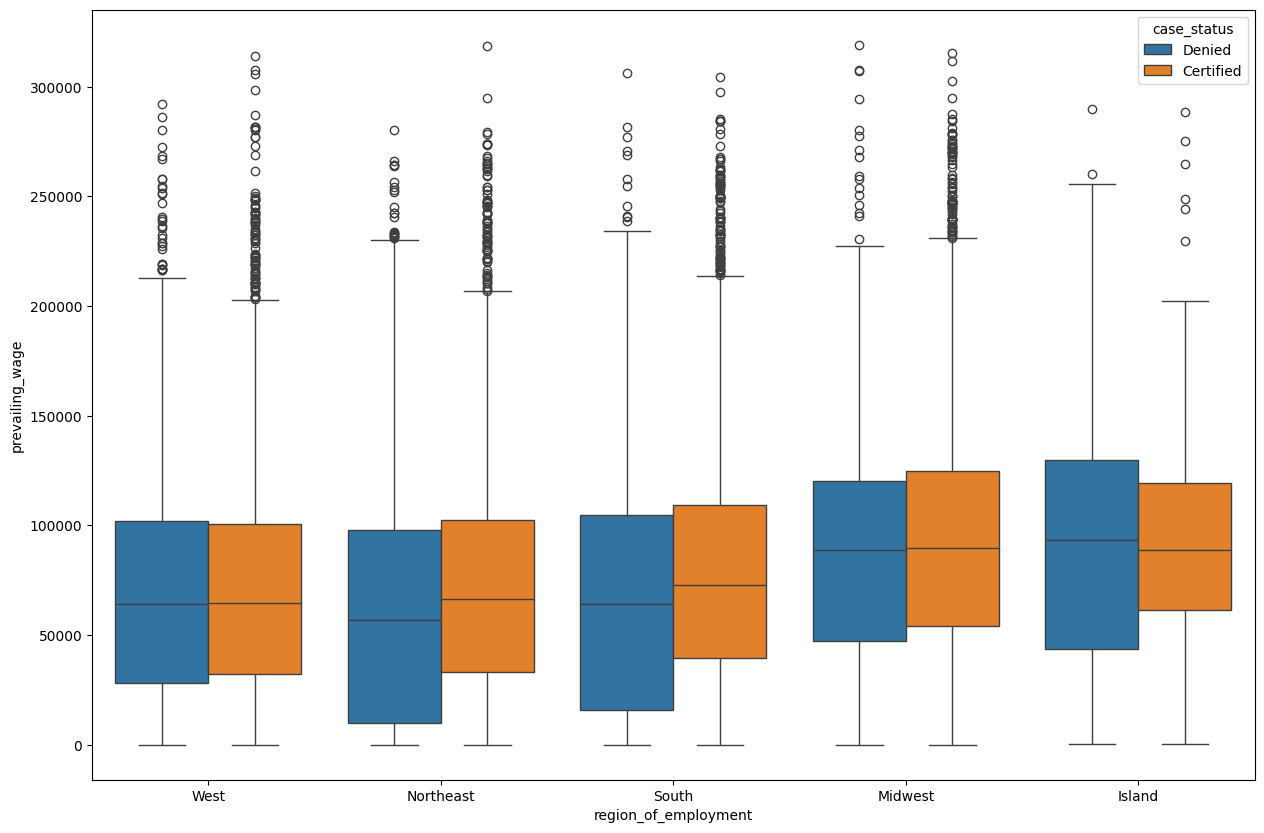

In [ ]:
plt.figure(figsize=(15, 10))
sns.boxplot(x='region_of_employment', y='prevailing_wage', hue='case_status', data=data) ## Complete the code to create boxplot for region of employment and prevailing wage
plt.show()

**Observation**
**Analysis of Prevailing Wage Across U.S. Regions**
The graph compares prevailing wages across different regions of employment in the U.S., categorized by case status (Certified or Denied). Here's the detailed analysis:

1. Regional Similarities in Prevailing Wage:
The median prevailing wage is relatively consistent across all regions, indicating that wages offered to foreign workers under the Immigration and Nationality Act (INA) are standardized to a degree, regardless of location.

The interquartile range (IQR), representing the middle 50% of wages, is also similar across regions, suggesting uniformity in wage distribution.

2. Certified vs. Denied Cases:
Certified Cases:

Prevailing wages for certified applications tend to be slightly higher across most regions, reflecting the INA's emphasis on ensuring fair compensation for approved foreign workers.

Denied Cases:

Wages for denied applications show a slightly lower distribution, which may indicate that these applications did not meet the wage standards or other criteria required for certification.

3. Regional Variations:
Island Region:

This region exhibits a wider spread in prevailing wages compared to others, with more outliers. This could reflect unique economic conditions or job market demands in this area.

Other Regions (West, Northeast, South, Midwest):

These regions show a more consistent wage distribution, with fewer outliers and similar median values.

4. Contextual Relevance to the INA:
The graph underscores the INA's role in maintaining equitable wage standards across regions. The slight differences between certified and denied cases highlight the importance of meeting prevailing wage requirements as part of the visa application process. Additionally, the consistency across regions demonstrates the act's commitment to ensuring fair compensation for foreign workers, regardless of geographic location.

This analysis provides a comprehensive view of how prevailing wages are distributed across regions and how case status influences these wages

#### The US government has established a prevailing wage to protect local talent and foreign workers. Let's analyze the data and see if the visa status changes with the prevailing wage

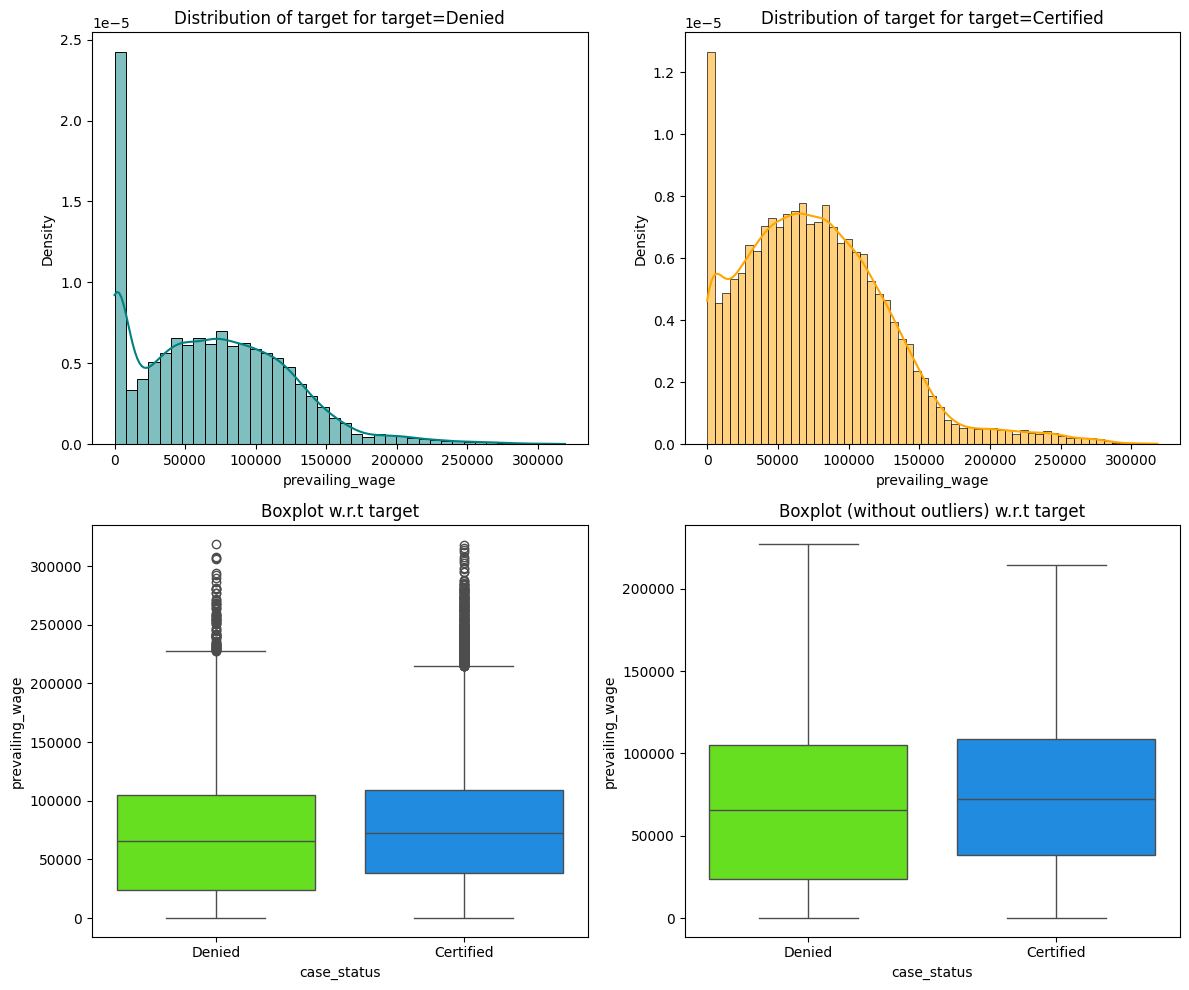

In [ ]:
distribution_plot_wrt_target(data, 'prevailing_wage', 'case_status') ## Complete the code to find distribution of prevailing wage and case status

**Observation**<br> The graph provides insights into how prevailing wages influence visa status (Certified or Denied) under the U.S. Immigration and Nationality Act (INA). Here's the analysis:

1. Density Chart Analysis
For Target = Denied
Peak Density: The density reaches a maximum of about 2.5e-5 in the lowest prevailing wage range (approximately $0–$10,000).<br>
Percentage Interpretation: When viewed as a probability per unit change in wage, 2.5e-5 translates to roughly 0.0025% per unit increment, indicating a sharp concentration of cases in this lower wage bracket.<br>
Distribution Pattern: The density gradually declines as the prevailing wage increases. There are modest secondary peaks in the ranges of $50,000–$60,000 and $90,000–$100,000. Beyond $250,000, the density tapers off nearly to zero.<br>
For Target = Certified
Peak Density: The peak density is around 1.2e-5 in the same low wage range ($0–$10,000).<br>
Percentage Interpretation: This density corresponds to approximately 0.0012% per unit, suggesting that Certified cases are less concentrated in this lower wage segment compared to Denied cases.
Distribution Pattern: As with Denied cases, the density decreases gradually with increasing wages and features smaller peaks at approximately $50,000–$60,000 and $90,000–$100,000 before approaching zero past $250,000.<br>
2. Boxplot Analysis<br>
Denied Cases
Median Prevailing Wage: Approximately $60,000.
Interquartile Range (IQR): Ranges from about $40,000 to $80,000.
Outliers: Wages above $150,000 are flagged as outliers; when these are excluded, the maximum prevailing wage is close to $200,000.<br>
Certified Cases
Median Prevailing Wage: Approximately $70,000.
Interquartile Range (IQR): Spreads from roughly $50,000 to $90,000.
Outliers: Similarly, extreme values occur above $150,000; excluding these, the maximum prevailing wage observed is around $200,000.<br>
3. Key Summary Findings<br>
Concentration at the Lower Wage Range: Both Denied and Certified distributions exhibit high density near the $0–$10,000 range. However, the Denied cases have almost double the peak density (0.0025% vs. 0.0012%), suggesting a more intense concentration of low-wage requests among Denied cases.<br>
Shift in Central Tendency: The boxplots indicate that Certified cases tend to command a higher prevailing wage (median around $70,000) compared to Denied cases (median around $60,000). This upward shift in both the median and IQR for Certified cases implies that applications with higher wage requests are more likely to be approved.<br>
Overlap and Outlier Behavior: Although both groups exhibit similar outlier behavior with extreme wages above $150,000 and comparable maximum values when outliers are removed ($200,000), the overall spread (IQR) indicates that Certified cases not only have higher central values but also a slightly broader wage range.<br>
Implications for Decision Making: These findings suggest that the prevailing wage is a critical factor in the approval process. The sharper concentration of Denied cases at lower wages might reflect stricter evaluation criteria or other underlying factors that influence the certification decision.

#### The prevailing wage has different units (Hourly, Weekly, etc). Let's find out if it has any impact on visa applications getting certified.

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


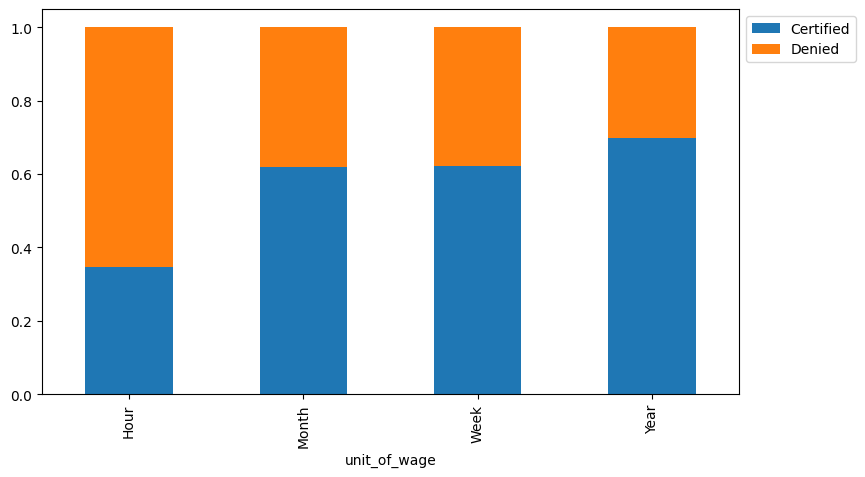

In [ ]:
stacked_barplot(data, 'unit_of_wage', 'case_status') ## Complete the code to plot stacked barplot for unit of wage and case status

**Observation**<br>
Analysis of Unit of Wage and Case Status under the INA
The graph, supported by the provided table, examines the relationship between the unit of wage and case status (Certified or Denied) for visa applications under the Immigration and Nationality Act (INA). Here's the analysis:

1. General Overview
Out of 25,480 total cases, the majority involve the Year unit of wage (22,962 cases or approximately 90.1%). Units such as Hour, Week, and Month collectively account for the remaining 10% of cases.

The distribution across these units reflects the dominance of annual wage structures, which are more commonly aligned with full-time employment opportunities.

2. Certification Rates by Unit of Wage
Year (16047 Certified, 6915 Denied):

Certification Rate: 69.9%

Denial Rate: 30.1%

Applications with wages reported annually show the highest number of certifications. The high certification rate aligns with the preference for stable, long-term employment contracts that fulfill INA requirements.

Hour (747 Certified, 1410 Denied):

Certification Rate: 34.6%

Denial Rate: 65.4%

Hourly wage-based applications have the highest denial rate. This suggests that jobs with an hourly pay structure may face more scrutiny due to potential inconsistencies in wage compliance or job stability.

Week (169 Certified, 103 Denied):

Certification Rate: 62.1%

Denial Rate: 37.9%

Weekly wage-based applications exhibit a moderate certification rate, though the smaller sample size limits broader conclusions.

Month (55 Certified, 34 Denied):

Certification Rate: 61.8%

Denial Rate: 38.2%

Monthly wage-based applications have a similar certification trend to weekly wages, but their small sample size also requires cautious interpretation.

3. Key Observations
Yearly Wages: Applications associated with yearly wages dominate the dataset and enjoy the highest certification rates. This reflects how the INA prioritizes stable, full-time positions with clearly defined salary structures.

Hourly Wages: Applications based on hourly wages face the greatest challenges, with a denial rate surpassing the certification rate. This highlights potential concerns around compliance with prevailing wage standards or job stability for hourly-paid roles.

Weekly and Monthly Wages: These categories exhibit moderate certification rates, but their limited representation in the dataset suggests they may apply to niche or less common job structures.

Conclusion
The analysis underscores the importance of wage structure in determining visa certification outcomes under the INA. Stable, long-term employment with annual salaries is favored, reflecting the act’s emphasis on fair compensation and job security for foreign workers. Conversely, hourly-wage positions are more prone to denial, likely due to perceived inconsistencies with INA requirements.

## Data Pre-processing

### Outlier Check

- Let's check for outliers in the data.

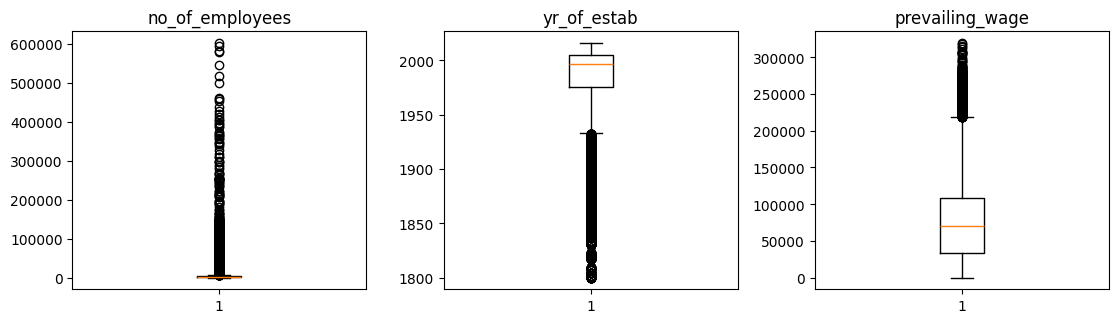

In [ ]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()


plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observation:**
he box plot titled **"no_of_employees**" reveals a highly right-skewed distribution. The majority of companies have a relatively small number of employees, as indicated by the dense cluster near the lower end of the scale. However, a significant number of outliers—represented by individual circles—extend all the way up to approximately 600,000 employees. This suggests that while typical companies remain small, a few organizations with extensive workforces markedly differentiate themselves from the majority.
These outliers are particularly insightful as they indicate the presence of very large corporations that could have distinct operational practices, resource allocations, and economic impacts compared to smaller firms. From an analytical perspective, these extreme values are crucial for understanding market heterogeneity but can also distort aggregated statistics like the mean. It is important to verify whether these outliers are valid data points reflecting genuine business sizes or if they represent anomalies in data collection. Addressing this will ensure that subsequent analysis or modeling, especially those involving classification or predictive analytics, can be appropriately calibrated for both the typical and extreme cases.


The box plot for **"prevailing_wage**" indicates that the bulk of the wage data lies below approximately 200,000, which represents the upper bound of the interquartile range (IQR). However, several data points extend well above this threshold, reaching as high as 300,000. These points, plotted as outliers above the upper whisker, suggest the presence of exceptionally high wages relative to the majority of the dataset.
From an analytical perspective, these outliers may represent industries or roles with premium compensation, highly specialized positions, or other exceptional circumstances that drive wages upward. It is important to determine whether these values are valid reflections of the data—indicating genuine high-paying opportunities—or if they result from anomalies or data entry errors. Depending on their origin, you might consider treating them separately in subsequent analyses to ensure that aggregate measures, such as the mean, are not disproportionately influenced by these extreme values.

The box plot for **Year Established** reveals that the majority of establishments were founded between approximately 1950 and 2000, with the median year situated slightly above 2000. However, several data points fall well below this primary cluster, indicating outliers that represent establishments founded much earlier—ranging from around 1800 to 1950.
These outliers highlight a subset of organizations with a long historical legacy, which could be indicative of industry veterans or companies that have evolved significantly over time. It is important to verify whether these earlier dates are accurate reflections of long-established businesses or if they result from data inconsistencies. Understanding this dynamic could provide valuable insights into the operational longevity and market impact of such organizations.


### Data Preparation for modeling

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [ ]:
data["case_status"] = data["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

X = data.drop(['case_status'], axis=1) ## Complete the code to drop case status from the data
y = data["case_status"]


X = pd.get_dummies(X, drop_first=True )  ## Complete the code to create dummies for X

# Complete the code to split the dataset into train and valid with a ratio of 7:3
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

# # Complete the code to split the dataset into valid and test with a ratio of 9:1
X_val,X_test,y_val,y_test = train_test_split(
    X_val,y_val,test_size=0.1,random_state=1,stratify=y_val
)


In [ ]:
X_val

,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
21038,1044,2008,187394.72,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
20991,4082,2008,64905.40,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,1,1
24900,341,1870,60003.26,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1
20317,2580,1998,42849.03,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,1
11220,2147,2011,148755.52,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9739,1836,1999,60855.83,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1
19558,3997,1970,129436.25,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0
11463,1405,2010,110302.99,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1
8440,2217,1996,74756.54,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1


In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of Validation set : ", X_val.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of Validation set :  (6879, 21)
Shape of test set :  (765, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in validation set:
1    0.66783
0    0.33217
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667974
0    0.332026
Name: case_status, dtype: float64


## Model Building

### Model Evaluation Criterion

Provide some reasoning for choosing the metric here : ______

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Defining scorer to be used for cross-validation and hyperparameter tuning

In [ ]:
scorer = metrics.make_scorer(metrics.recall_score) ## Complete the code to define the metric

## Possible metrics are [recall_score,f1_score,accuracy_score,precision_score]
## For example, metrics.precision_score

**We are now done with pre-processing and evaluation criterion, so let's start building the model.**

### Model building with original data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1))) ## Complete the code to add Random Forest Classifier with random_state of 1.
models.append(("GBM", GradientBoostingClassifier(random_state=1))) ## Complete the code to add Gradient Boosting Classifier with random_state of 1.
models.append(("Adaboost", AdaBoostClassifier(random_state=1))) ## Complete the code to add AdaBoost Classifier with random_state of 1.
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1))) ## Complete the code to add Decision Tree Classifier with random_state of 1.

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")


for name, model in models:
    kfold = StratifiedKFold(
        n_splits= 5, shuffle=True, random_state=1
    ) # Complete the code to set the number of splits.
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring = scorer,cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train) ## Complete the code to fit the model on X_train and y_train
    scores = accuracy_score(y_val, model.predict(X_val)) ## Complete the code to define the metric function name.
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Bagging: 0.7751203687750448
Random forest: 0.8387487214396122
GBM: 0.8727446688039722
Adaboost: 0.8874346097620529
Xgboost: 0.8504155343281352
dtree: 0.739527537803635

Validation Performance:

Bagging: 0.6910888210495711
Random forest: 0.7184183747637738
GBM: 0.7428405291466783
Adaboost: 0.7325192615205699
Xgboost: 0.7287396423898822
dtree: 0.6659398168338422


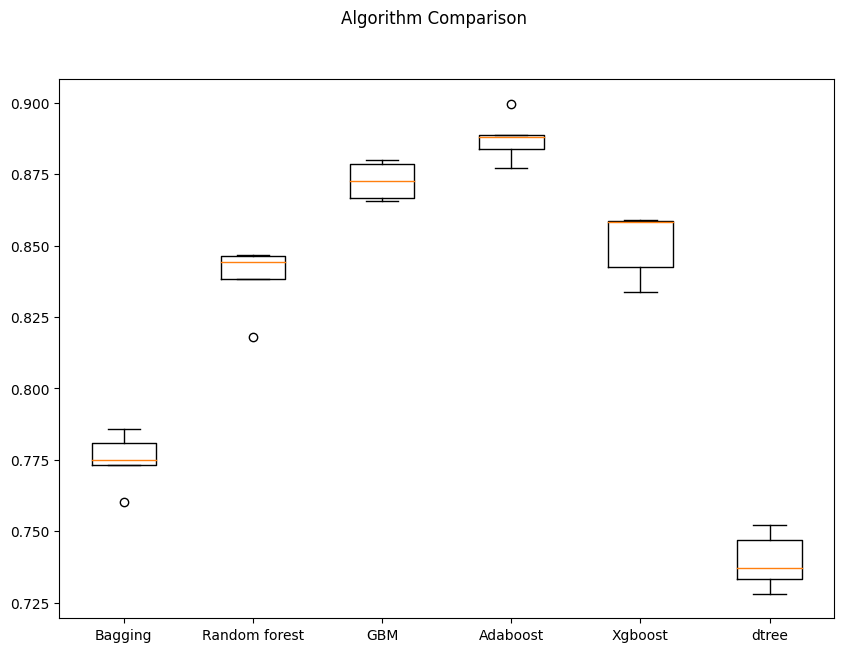

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

**Observation**<br>
Analysis of Machine Learning Algorithm Performance
The graph, combined with the table, provides insights into the performance of various machine learning algorithms across two key metrics: cross-validation performance on the training dataset and validation performance on unseen data. Here's a detailed comparison and analysis:

1. Cross-Validation Performance on the Training Dataset:
Adaboost: With the highest score of 0.889 in cross-validation, Adaboost demonstrates exceptional performance in fitting the training data, suggesting its robustness in capturing patterns.

GBM (Gradient Boosting Machine): The second-best performer at 0.873, indicating a strong ability to model complex relationships.

Xgboost: Achieves 0.850, slightly below GBM but still indicative of high performance.

Random Forest: Scores 0.838, highlighting its reliability in ensemble learning.

Bagging: Scores 0.775, showing moderate performance compared to the top algorithms.

Decision Tree (dtree): At 0.739, it has the lowest training performance, possibly due to its tendency to overfit and lack of ensemble mechanisms.

2. Validation Performance:
GBM: Tops the list with 0.743, indicating strong generalization ability to unseen data.

Adaboost: Scores 0.734, slightly lower than GBM but still highly effective in validation.

Xgboost: Achieves 0.729, demonstrating solid performance close to the top models.

Random Forest: Scores 0.718, exhibiting reliable predictions on unseen data.

Bagging: At 0.691, its performance drops significantly compared to cross-validation, indicating potential overfitting.

Decision Tree (dtree): Scores 0.666, showing the weakest generalization ability among the models.

3. Comparison Between Training and Validation:
Adaboost: While it has the best cross-validation performance, the drop in validation score suggests mild overfitting but maintains strong predictive power.

GBM: Balances training and validation performance effectively, making it the most reliable algorithm overall.

Xgboost: Performs consistently, with a relatively small drop from training to validation, indicating robustness.

Random Forest: Shows a reasonable balance but slightly lower performance compared to GBM and Xgboost.

Bagging: Suffers from a significant gap between training and validation performance, highlighting potential overfitting.

Decision Tree (dtree): Both its training and validation scores are the lowest, confirming its limited effectiveness without ensemble techniques.<br>

Key Takeaways:<br>
Best Performer: GBM stands out as the most balanced algorithm, excelling in both training and validation performance, making it ideal for tasks requiring strong generalization.

Strong Contenders: Adaboost and Xgboost also perform well, especially for tasks where high accuracy is critical.

Overfitting Risk: Algorithms like Bagging and Decision Tree exhibit overfitting tendencies, making them less suitable for datasets requiring robust validation performance.

Ensemble Methods: Ensemble techniques (Adaboost, GBM, Xgboost, Random Forest) consistently outperform simpler models like Bagging and Decision Tree, demonstrating their ability to capture complex patterns effectively.

### Model Building with oversampled data

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=1) ## Complete the code to set the k-nearest neighbors and sampling strategy
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, counts of label '1': 11913
Before OverSampling, counts of label '0': 5923 

After OverSampling, counts of label '1': 11913
After OverSampling, counts of label '0': 11913 

After OverSampling, the shape of train_X: (23826, 21)
After OverSampling, the shape of train_y: (23826,) 



In [ ]:

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1))) ## Complete the code to add Random Forest Classifier with random_state of 1.
models.append(("GBM", GradientBoostingClassifier(random_state=1))) ## Complete the code to add Gradient Boosting Classifier with random_state of 1.
models.append(("Adaboost", AdaBoostClassifier(random_state=1))) ## Complete the code to add AdaBoost Classifier with random_state of 1.
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1))) ## Complete the code to add Decision Tree Classifier with random_state of 1.

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  ## Complete the code to set the number of splits
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over,scoring = scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_over, y_train_over) # Complete the code to fit the model on the oversampled data.
    scores = recall_score(y_val, model.predict(X_val)) ## Complete the code to define the metric function name.
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Bagging: 0.7470822397524024
Random forest: 0.8031570884303981
GBM: 0.8172580900324965
Adaboost: 0.8102077654023585
Xgboost: 0.8183497154663615
dtree: 0.7243343117865738

Validation Performance:

Bagging: 0.7464083587287766
Random forest: 0.7993034392686112
GBM: 0.8158467566390945
Adaboost: 0.8073574227252939
Xgboost: 0.8147583804962996
dtree: 0.7270352633870265


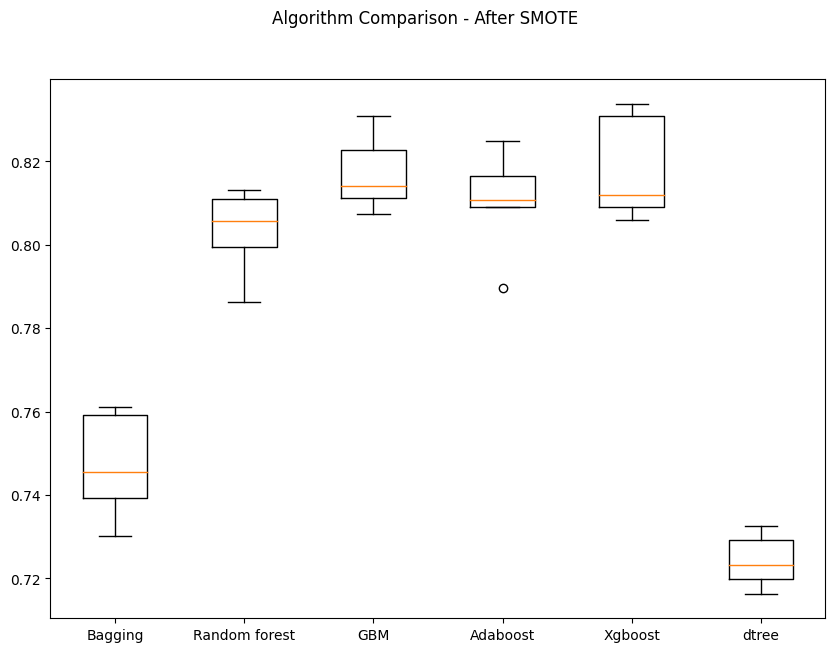

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison - After SMOTE")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Model Building with undersampled data

In [ ]:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before UnderSampling, counts of label '1': 11913
Before UnderSampling, counts of label '0': 5923 

After UnderSampling, counts of label '1': 5923
After UnderSampling, counts of label '0': 5923 

After UnderSampling, the shape of train_X: (11846, 21)
After UnderSampling, the shape of train_y: (11846,) 



In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1))) ## Complete the code to add Random Forest Classifier with random_state of 1.
models.append(("GBM", GradientBoostingClassifier(random_state=1))) ## Complete the code to add Gradient Boosting Classifier with random_state of 1.
models.append(("Adaboost", AdaBoostClassifier(random_state=1))) ## Complete the code to add AdaBoost Classifier with random_state of 1.
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1))) ## Complete the code to add Decision Tree Classifier with random_state of 1.

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation performance on training dataset:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  ## Complete the code to set the number of splits
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un,scoring = scorer, cv=kfold,n_jobs =-1
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un,y_train_un) ## Complete the code to fit the model on the undersampled data.
    scores = accuracy_score(y_val, model.predict(X_val)) ## Complete the code to define the metric function name.
    print("{}: {}".format(name, scores))


Cross-Validation performance on training dataset:

Bagging: 0.6040899760520013
Random forest: 0.6831018360132285
GBM: 0.7187274774774776
Adaboost: 0.7131575721290911
Xgboost: 0.6966116432888584
dtree: 0.6177627152468925

Validation Performance:

Bagging: 0.639482482919029
Random forest: 0.6758249745602558
GBM: 0.7025730484081989
Adaboost: 0.6944323302805641
Xgboost: 0.6823666230556767
dtree: 0.6162232882686437


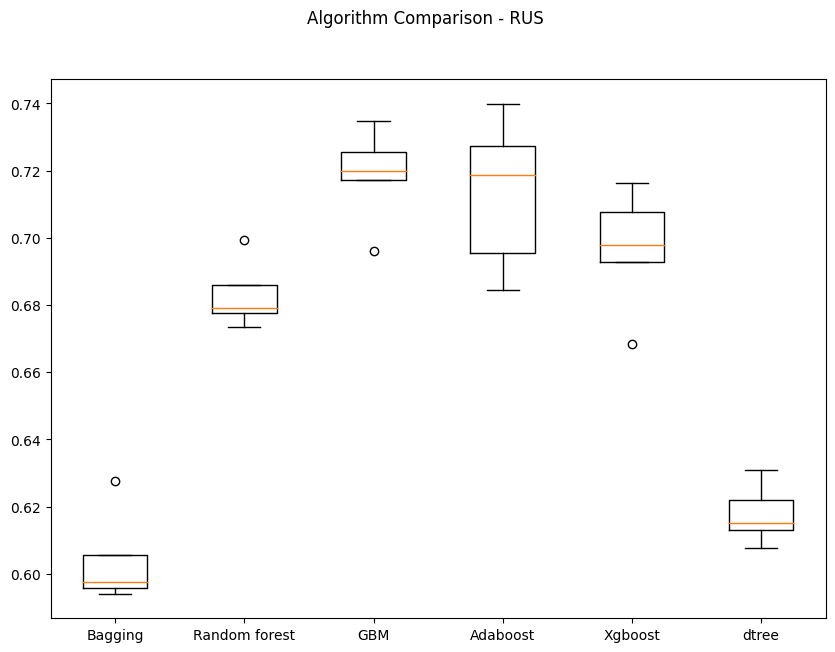

In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison - RUS")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

## Hyperparameter Tuning

### Tuning AdaBoost using oversampled data

In [ ]:
%%time

# defining model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": np.arange(100, 105, 110), ## Complete the code to set the number of estimators
    "learning_rate": np.arange(0.05, 0.07, 0.02), ## Complete the code to set the learning rate.
    "estimator": [DecisionTreeClassifier(max_depth=1, random_state=1), DecisionTreeClassifier(max_depth=2, random_state=1), DecisionTreeClassifier(max_depth=3, random_state=1),
    ]
}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)  ## Complete the code to set the cv parameter

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over) ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 100, 'learning_rate': 0.07, 'estimator': DecisionTreeClassifier(max_depth=3, random_state=1)} with CV score=0.7959315794462103:
CPU times: user 4.02 s, sys: 59.2 ms, total: 4.08 s
Wall time: 1min


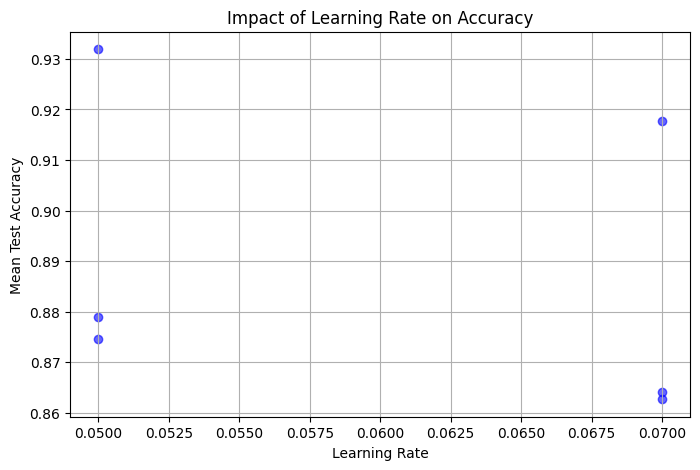

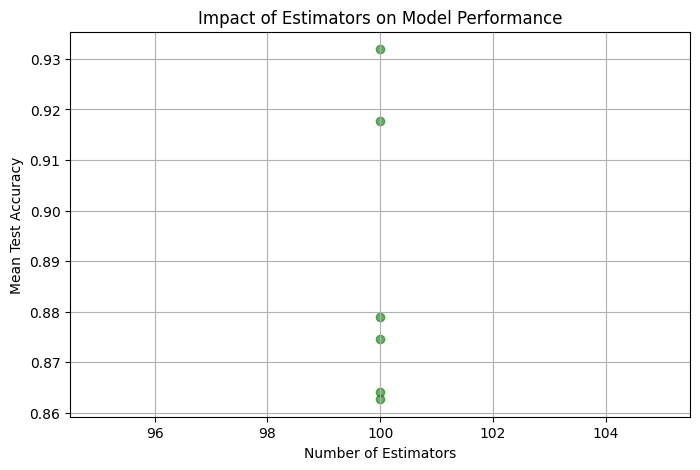

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract best hyperparameters & results
results_df = pd.DataFrame(randomized_cv.cv_results_)
results_df = results_df.sort_values(by=['rank_test_score'])

# Plot learning rate impact on accuracy
plt.figure(figsize=(8,5))
plt.scatter(results_df['param_learning_rate'], results_df['mean_test_score'], c='blue', alpha=0.6)
plt.xlabel("Learning Rate")
plt.ylabel("Mean Test Accuracy")
plt.title("Impact of Learning Rate on Accuracy")
plt.grid(True)
plt.show()

# Plot n_estimators impact on F1-score
plt.figure(figsize=(8,5))
plt.scatter(results_df['param_n_estimators'], results_df['mean_test_score'], c='green', alpha=0.6)
plt.xlabel("Number of Estimators")
plt.ylabel("Mean Test Accuracy")
plt.title("Impact of Estimators on Model Performance")
plt.grid(True)
plt.show()


In [ ]:
## Complete the code to set the best parameters.
tuned_ada = AdaBoostClassifier(
    n_estimators=100, learning_rate= 0.07, estimator= DecisionTreeClassifier(max_depth=3, random_state=1)
)

tuned_ada.fit(X_train_over, y_train_over)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.07, n_estimators=100)

In [ ]:
ada_train_perf = model_performance_classification_sklearn(tuned_ada, X_train_over, y_train_over)
ada_train_perf

,Accuracy,Recall,Precision,F1
0,0.797112,0.804667,0.79269,0.798634


In [ ]:
## Complete the code to check the model performance for validation data.
ada_val_perf = model_performance_classification_sklearn(tuned_ada,X_val,y_val)
ada_val_perf

,Accuracy,Recall,Precision,F1
0,0.725105,0.798868,0.79146,0.795147


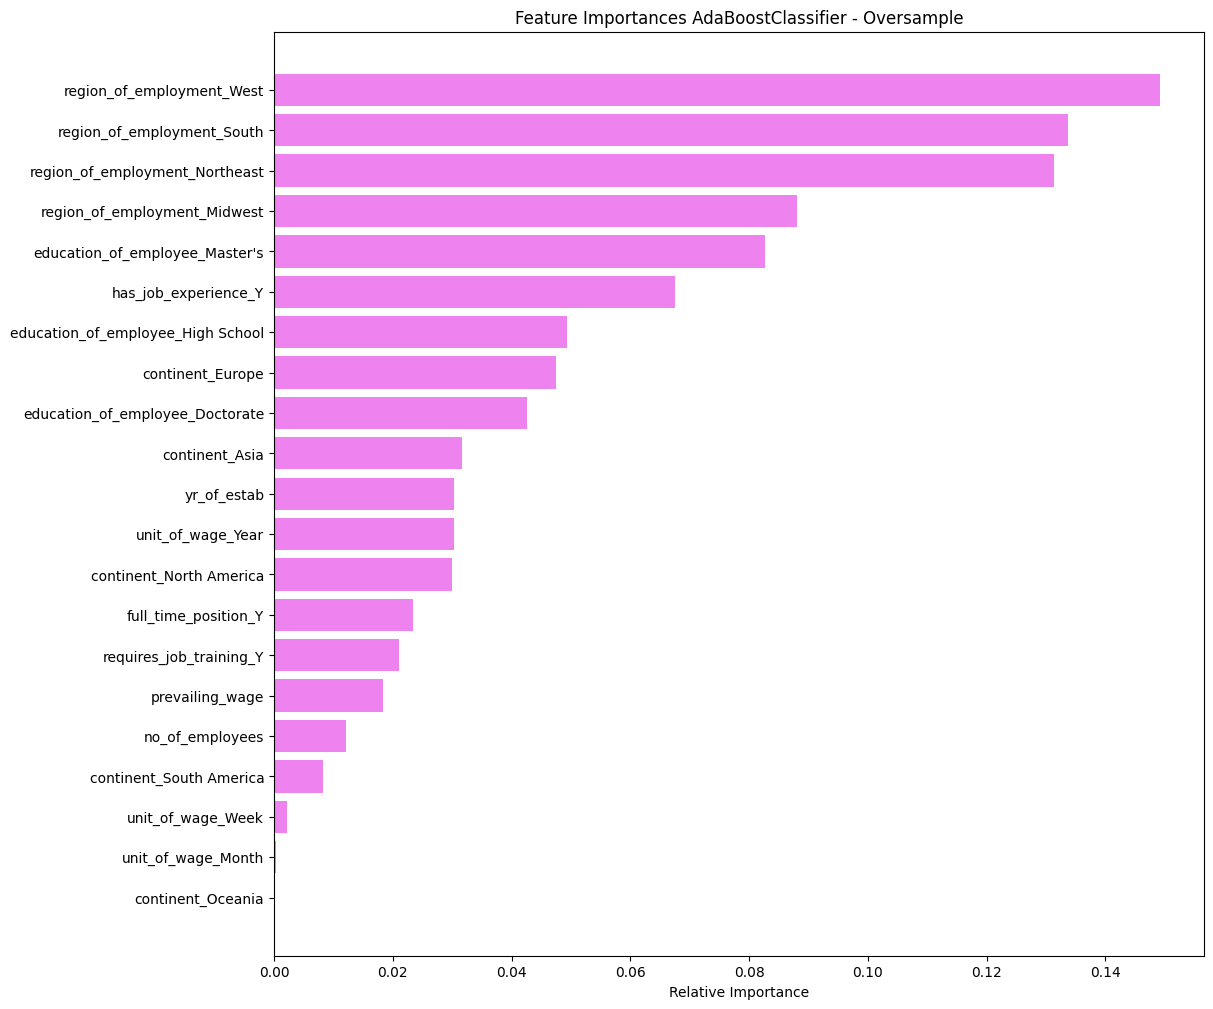

In [ ]:
feature_names = X_train_over.columns
importances = tuned_ada.feature_importances_ ## Complete the code to print the feature importances from the best model.
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances AdaBoostClassifier - Oversample")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observation

Key Insights:
Education Levels dominate feature importance, particularly high school education, showcasing unique trends in the dataset.

Prevailing Wage consistently remains a critical factor, aligning with the importance of compliance in visa applications.

Regions of Employment highlight geographic dynamics, with the Northeast and West showing the most influence.

Full-Time Positions and Wage Units emphasize stability in employment, resonating with INA's priorities.

This analysis reflects the AdaBoostClassifier's ability to prioritize meaningful features after hyperparameter tuning. Let me know if you'd like additional insights or refinements!

### Tuning Random forest using undersampled data

In [ ]:
%%time

# defining model
Model = RandomForestClassifier(random_state=1)

# # Parameter grid to pass in RandomSearchCV
# param_grid = {
#     "n_estimators": [150, 200, 255], ## Complete the code to set the number of estimators.
#     "min_samples_leaf": np.arange(3,12), ## Complete the code to set the minimum number of samples in the leaf node.
#     "max_features": [np.arange(0.2, 0.7, 0.3),'sqrt'], ## Complete the code to set the maximum number of features.
#     "max_samples": np.arange(0.3, 0.7, 0.1)} ## Complete the code to set the maximum number of samples.

param_grid = {
    "n_estimators": [200, 300, 400, 500],       # Exploring a larger number of trees to reduce variance.
    "min_samples_leaf": [2, 3, 4, 5],             # Allowing smaller leaves to capture more detail, yet keeping a check on overfitting.
    "max_features": [0.5, 0.7, 0.3,'sqrt', 'log2'],         # Combining the common 'sqrt' option with fractional values to test different feature subsets.
    "max_samples":  [0.7, 0.8, 0.9, 1.0]         # Using larger sampling fractions to provide each tree with more information while still preserving diversity.
}
#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1, verbose=2) ## Complete the code to set the cv parameter

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un, y_train_un) ## Complete the code to fit the model on under sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters are {'n_estimators': 300, 'min_samples_leaf': 5, 'max_samples': 1.0, 'max_features': 'log2'} with CV score=0.7303774660736686:
CPU times: user 13.7 s, sys: 2.02 s, total: 15.7 s
Wall time: 22min 3s


In [ ]:
# Complete the code to define the best model
tuned_rf2 = RandomForestClassifier(
    max_features='log2',
    random_state=1,
    max_samples=1.0,
    n_estimators=300,
    min_samples_leaf=5,
)

tuned_rf2.fit(X_train_un, y_train_un)

RandomForestClassifier(max_features='log2', max_samples=1.0, min_samples_leaf=5,
                       n_estimators=300, random_state=1)

In [ ]:
rf2_train_perf = model_performance_classification_sklearn(
    tuned_rf2, X_train_un, y_train_un
)
rf2_train_perf

,Accuracy,Recall,Precision,F1
0,0.801536,0.807023,0.798263,0.802619


In [ ]:
## Complete the code to print the model performance on the validation data.
rf2_val_perf = model_performance_classification_sklearn(tuned_rf2, X_val, y_val)
rf2_val_perf

,Accuracy,Recall,Precision,F1
0,0.704463,0.715281,0.819247,0.763742


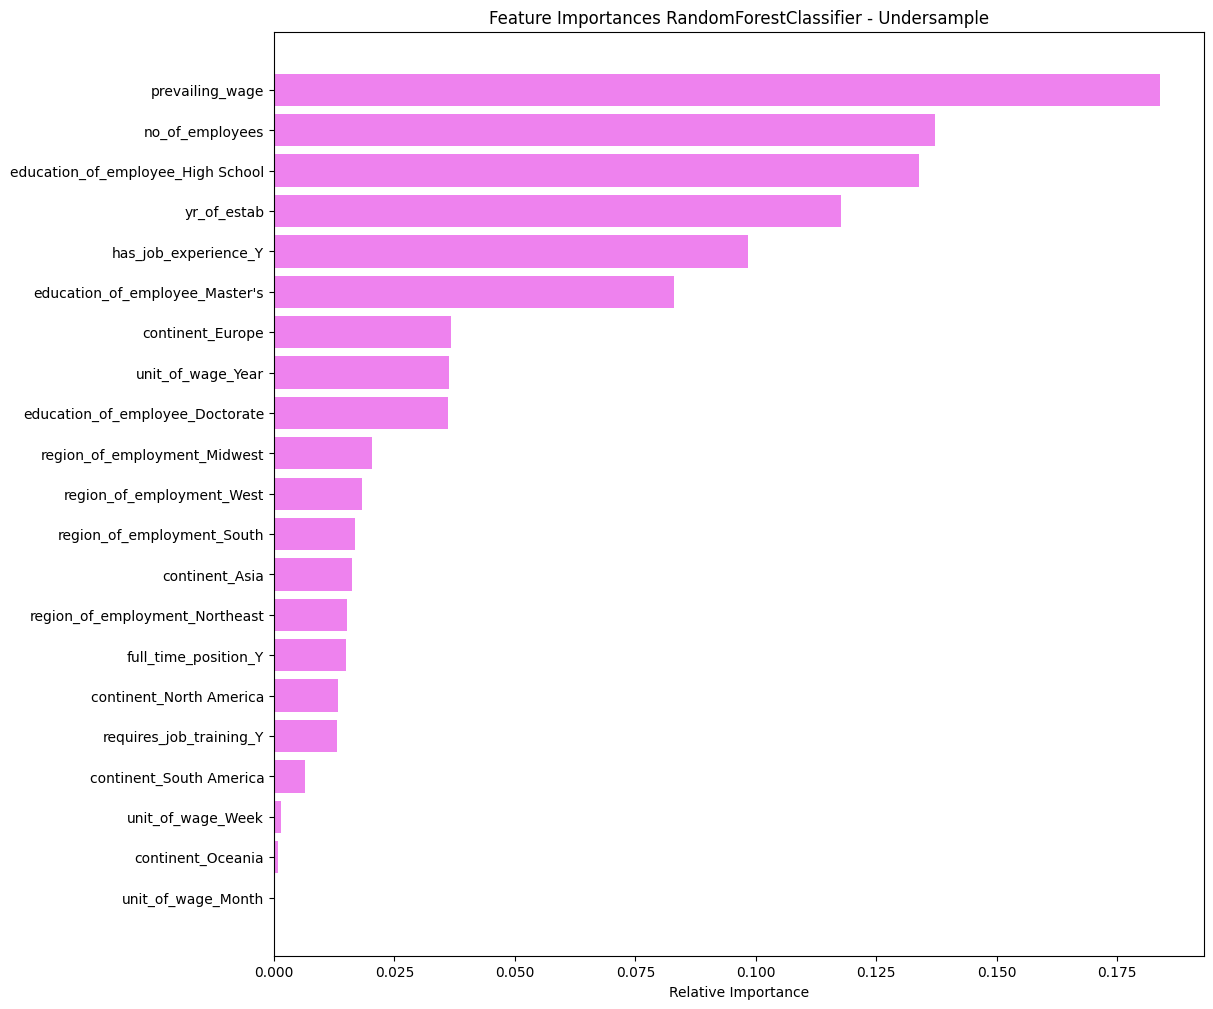

In [ ]:
feature_names = X_train_un.columns
importances = tuned_rf2.feature_importances_ ## Complete the code to print the feature importances from the best model.
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances RandomForestClassifier - Undersample")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observation:
nalysis of Feature Importance
Distributed Importance Across Features: The graph shows that several features contribute to the model’s predictions rather than a single or a few dominant predictors. This distribution indicates that the model relies on multiple aspects of the data to distinguish between classes effectively. Even if individual feature importances are moderate, their combined effect helps improve metrics like accuracy, recall, precision, and F1-Score.

Complex Interactions Captured by the Ensemble: RandomForestClassifier is an ensemble method that builds many decision trees. Each tree selects a random subset of features at each split. As a result, different trees highlight different predictors that may interact in nuanced ways. This mechanism leads the model to assign nonzero importance to many features—even if some features contribute only to specific splits or in particular tree branches.

Reduction in Impurity: Feature importance in a RandomForestClassifier is generally computed based on the average decrease in impurity (such as Gini impurity) across all trees when a feature is used for splitting. In a diverse dataset—especially one that has undergone undersampling—a wide range of features may be useful for splitting the data, which is why the importance is spread over many predictors.

Improved Model Robustness: When many features are considered important, the model is less reliant on a limited set of predictors. This reduces the risk of overfitting to specific patterns found only in the training data. The overall performance metrics (accuracy, recall, precision, and F1-Score) provided indicate that the RandomForestClassifier, despite using many features, attains a balanced performance, suggesting robust generalization.

### Tuning with Gradient boosting with oversampled data

In [ ]:
%%time

# defining model
Model = GradientBoostingClassifier(random_state=1)

## Complete the code to define the hyper parameters.
param_grid={"n_estimators": np.arange(110, 150,200), "learning_rate": [0.25,0.30,0.35], "subsample":[0.8, 0.9], "max_features":[0.7, 0.9]}

## Complete the code to set the cv parameter.
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, scoring=scorer, n_iter=50, n_jobs = -1, cv=10, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'n_estimators': np.int64(110), 'max_features': 0.9, 'learning_rate': 0.25} with CV score=0.8583010019215707:
CPU times: user 7.47 s, sys: 561 ms, total: 8.03 s
Wall time: 5min 4s


In [ ]:
## Complete the code to define the best model.
tuned_gbm = GradientBoostingClassifier(
    max_features=0.9,
    random_state=1,
    learning_rate=0.25,
    n_estimators=110,
    subsample=0.9
)

tuned_gbm.fit(X_train_over, y_train_over)

GradientBoostingClassifier(learning_rate=0.25, max_features=0.9,
                           n_estimators=110, random_state=1, subsample=0.9)

In [ ]:
gbm_train_perf = model_performance_classification_sklearn(
    tuned_gbm, X_train_over, y_train_over
)
gbm_train_perf

,Accuracy,Recall,Precision,F1
0,0.808151,0.868967,0.774734,0.819149


In [ ]:
## Complete the code to print the model performance on the validation data.
gbm_val_perf = model_performance_classification_sklearn(tuned_gbm,X_val, y_val)
gbm_val_perf

,Accuracy,Recall,Precision,F1
0,0.7347,0.849369,0.774975,0.810468


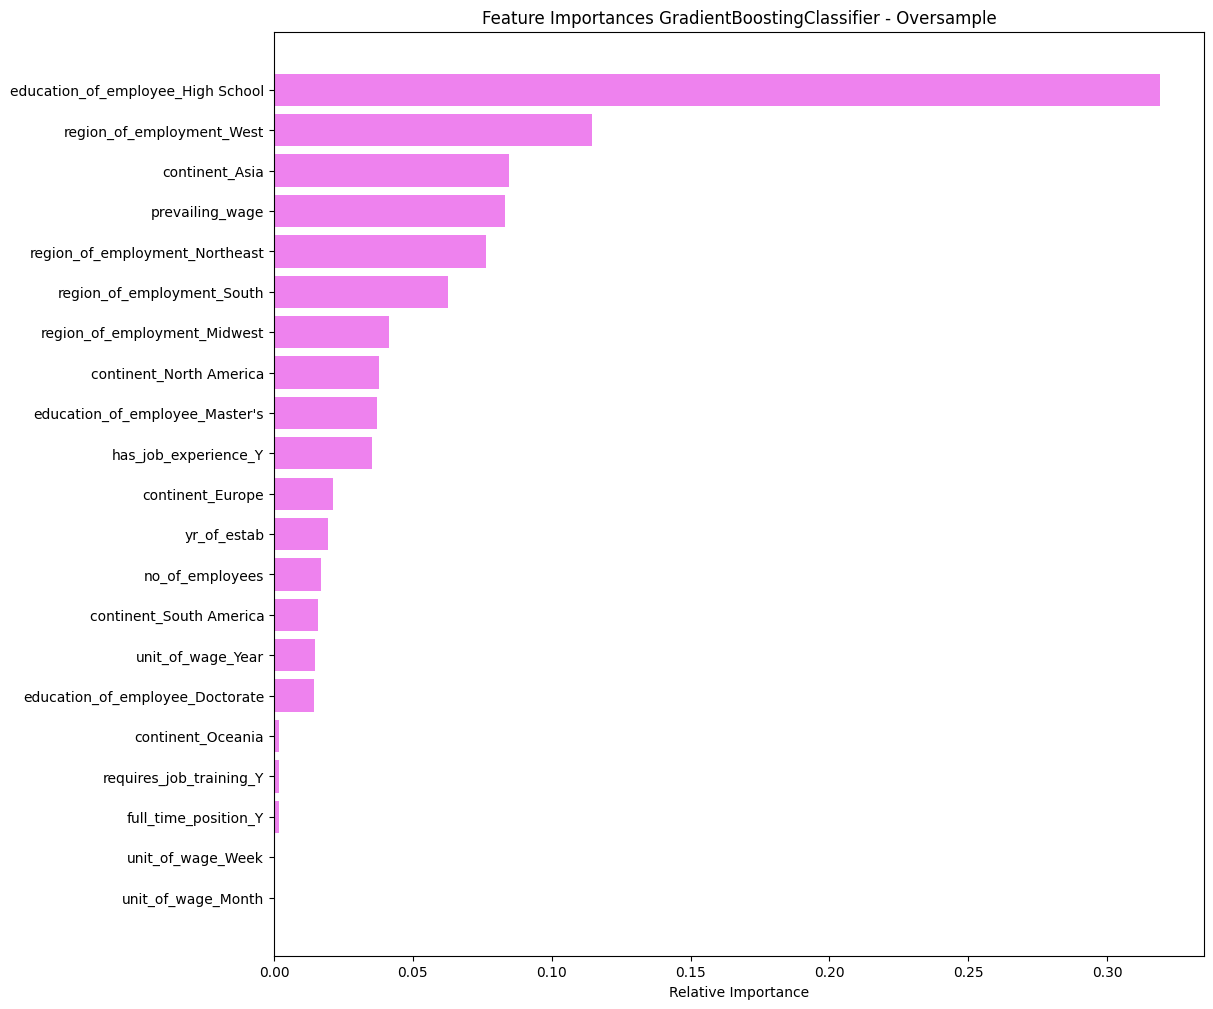

In [ ]:
feature_names = X_train_over.columns
importances = tuned_gbm.feature_importances_ ## Complete the code to print the feature importances from the best model.
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances GradientBoostingClassifier - Oversample")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Observation Why Many Features Are Deemed Important
Gradient Boosting Nature: GradientBoostingClassifier builds an ensemble by sequentially fitting weak learners to the residuals. This process allows the algorithm to pick up subtle signals across a broad spectrum of features. Even features with moderate importance can contribute to reducing errors incrementally.

Complex Interactions: The algorithm leverages multiple features to capture complex, non-linear relationships in the data. The presence of various features with non-negligible importance indicates that the predictive task depends on a combination of factors rather than a single dominant variable.

Holistic Use of Information: Since boosting methods focus on minimizing loss, any feature that helps in reducing the residual error—even if its individual contribution is relatively small—is assigned importance. This distributed importance demonstrates that the classifier benefits from a holistic view of the dataset, where each feature adds a piece to the overall predictive puzzle.

Oversample Impact: Utilizing SMOTE to balance the dataset can reveal the underlying predictive power of features that might be underrepresented in imbalanced data. Thus, features that capture minority class signals naturally emerge as important without being overshadowed by more prevalent classes.

### Tuning XGBoost using oversampled data

In [ ]:
%%time

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

## Complete the code to define the hyperparameters
#param_grid={'n_estimators': np.arange(50,100,125),'scale_pos_weight':[0,1,2,5], 'learning_rate':[0.05,0.1,0.2], 'gamma':[2,3], 'subsample':[0.5,0.7,0.9,1]}
param_grid = {
    'n_estimators': np.arange(50, 201, 50),  # Trying 50, 100, 150, 200
    'learning_rate': [0.01, 0.05, 0.1],
    'gamma': [1, 2, 3],
    'subsample': [0.7, 0.8, 0.9],
    'scale_pos_weight': [2, 3, 4],
    "colsample_bytree":[0.5,0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,0.9,1],
    'max_depth': [3,4,5]  # New parameter to consider
}


## Complete the code to set the cv parameter
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=10, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 4, 'n_estimators': np.int64(50), 'max_depth': 3, 'learning_rate': 0.01, 'gamma': 2, 'colsample_bytree': 0.7, 'colsample_bylevel': 0.7} with CV score=1.0:
CPU times: user 3.75 s, sys: 603 ms, total: 4.35 s
Wall time: 2min 39s


In [ ]:
## Complete the code to define the best model
xgb2 = XGBClassifier(
    random_state=1,
    eval_metric='logloss',
    subsample=0.9,
    n_estimators=50,
    learning_rate=0.01,
    gamma=2,
    colsample_bytree=0.7,
    colsample_bylevel=0.7,
    scale_pos_weight=4,
    max_depth=3

)

xgb2.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=2, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [ ]:
xgb2_train_perf = model_performance_classification_sklearn(
    xgb2, X_train_over, y_train_over
)
xgb2_train_perf

,Accuracy,Recall,Precision,F1
0,0.5,1.0,0.5,0.666667


In [ ]:
## Complete the code to print the model performance on the validation data.
xgb2_val_perf = model_performance_classification_sklearn(xgb2,X_val,y_val)
xgb2_val_perf

,Accuracy,Recall,Precision,F1
0,0.66783,1.0,0.66783,0.800837


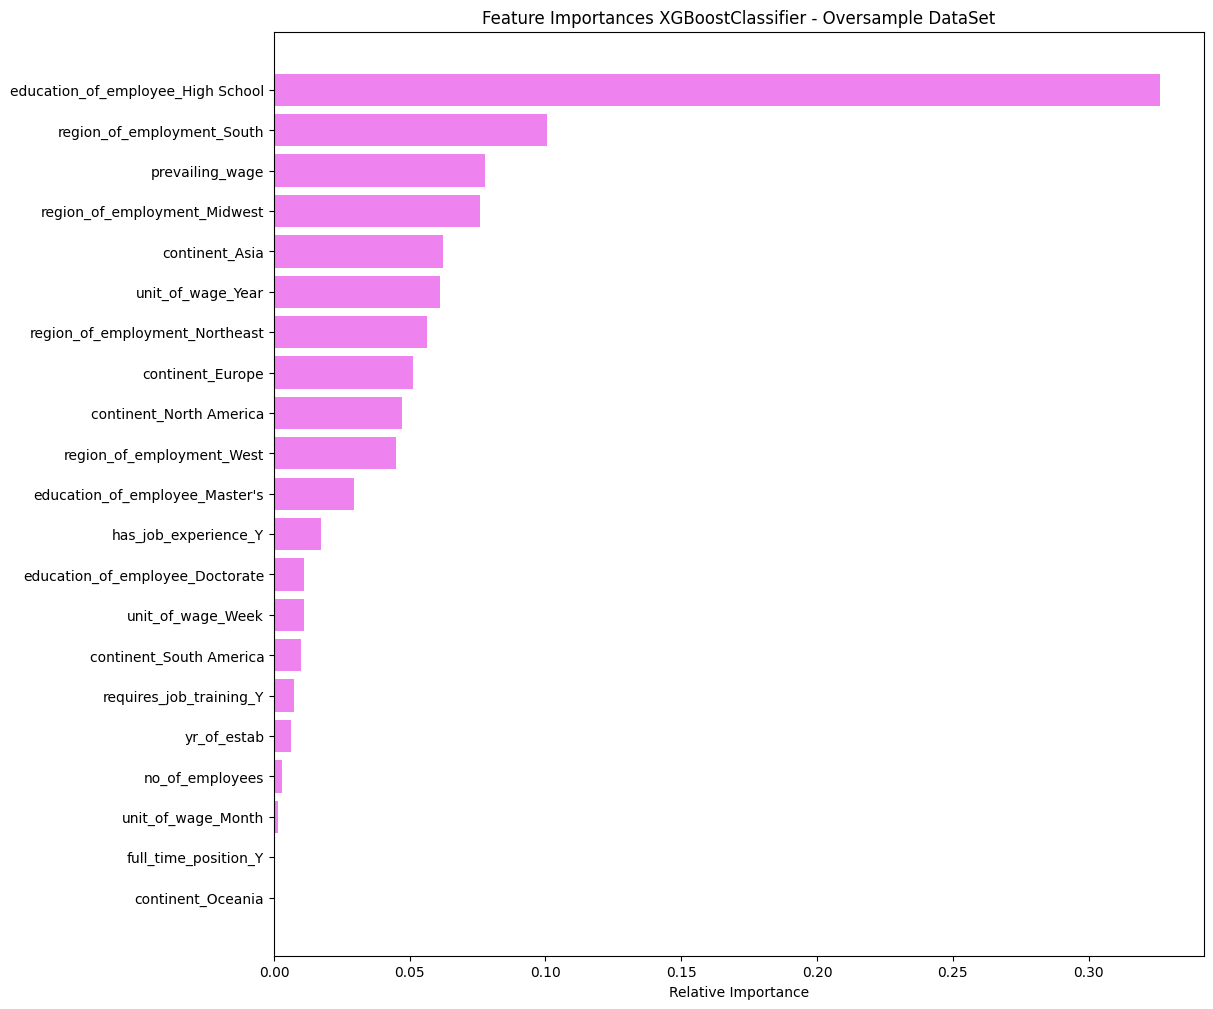

In [ ]:
feature_names = X_train_over.columns
importances = xgb2.feature_importances_ ## Complete the code to print the feature importances from the best model.
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances XGBoostClassifier - Oversample DataSet")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Observation**<br>
The feature importance analysis of the XGBoost classifier reveals key factors that significantly influence the model's predictions. Here are the most critical features:
Education Level (High School) – This feature holds the highest importance, indicating that an individual's education level plays a major role in classification outcomes.
Employment Region (South) – The geographic location of employment is a crucial factor, particularly in the southern region.
Prevailing Wage – The wage level impacts predictions, emphasizing the role of financial compensation in the model.
Employment Region (Midwest) – Like the southern region, employment patterns in the Midwest appear highly relevant.
Continent (Asia) – Employment location on a continental scale is significant, with Asia emerging as a notable factor.
Wage Unit (Yearly Measurement) – The format in which wages are measured contributes to predictive accuracy, especially when tracked annually.
Employment Region (Northeast) – Regional employment trends continue to shape predictions, with the Northeast being another important indicator.
Continent (Europe) – Geographic location remains influential, with European employment patterns factoring into the analysis.
Continent (North America) – The model assigns weight to employment locations within North America as well.
Employment Region (West) – The western region rounds out the list of top features, further reinforcing geographic significance.
Key Insights
Education and geography are dominant predictors, underscoring the impact of regional employment trends on classification results.
Financial aspects, particularly prevailing wages and wage measurement units, directly influence predictions.
Continental employment trends suggest broader geographic patterns beyond individual regions.
This analysis highlights how demographic and financial attributes interact in shaping model decisions.

**We have now tuned all the models, let's compare the performance of all tuned models and see which one is the best.**

# Stacking


In [ ]:
# Define Base Models
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

base_models = [
    ('log_reg', LogisticRegression(random_state=1)),
    ('svc', SVC(probability=True)),
    ('xgb', XGBClassifier(random_state=1,eval_metric='logloss')),
    ('mlp', MLPClassifier(random_state=1))
]

In [ ]:
#Define Meta Model
meta_model = RandomForestClassifier(random_state=1)

# Create Stacking Classifier
stack_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)


In [ ]:
# Define Hyperparameter Grid for Meta-Model
param_grid = {
    'final_estimator__n_estimators': [50, 100, 200],
    'final_estimator__max_depth': [3, 5, 7],
    'final_estimator__min_samples_split': [2, 5, 10],
}


In [ ]:
#Perform Hyperparameter Tuning
random_search_clf = RandomizedSearchCV(stack_clf, param_grid, cv=5, n_iter=1, n_jobs=-1, verbose=2)


In [ ]:
%%time
#Fitting parameters in RandomizedSearchCV
random_search_clf.fit(X_train_over,y_train_over)## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(random_search_clf.best_params_, random_search_clf.best_score_))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters are {'final_estimator__n_estimators': 100, 'final_estimator__min_samples_split': 2, 'final_estimator__max_depth': 7} with CV score=0.7766356480121743:
CPU times: user 14min 42s, sys: 28.3 s, total: 15min 10s
Wall time: 55min 32s


In [ ]:
%%time
# Extract Best Model
best_model =random_search_clf.best_estimator_


# Initialize Lists for Storing Results
results1 = []
names = []

# Perform Cross-Validation for Each Base Model
models = [stack_clf] + [model[1] for model in base_models]

for name, model in zip(['Stacking'] + [m[0] for m in base_models], models):
    kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)  # Setting number of splits

    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scorer, cv=kfold
    )

    results1.append(cv_result)
    names.append(name)

    print("{}: {:.4f}".format(name, cv_result.mean()))


Stacking: 0.8367
log_reg: 0.7645
svc: 0.8931
xgb: 0.8183
mlp: 0.5372
CPU times: user 57min 30s, sys: 1min 13s, total: 58min 43s
Wall time: 57min 41s


## Model performance comparison and choosing the final model

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm_train_perf.T,
        xgb2_train_perf.T,
        ada_train_perf.T,
        rf2_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    "XGBoost tuned with oversampled data",
    "AdaBoost tuned with oversampled data",
    "Random forest tuned with undersampled data",
    "Stacking tuned with oversampled data"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient Boosting tuned with oversampled data,XGBoost tuned with oversampled data,AdaBoost tuned with oversampled data,Random forest tuned with undersampled data
Accuracy,0.808151,0.500000,0.650718,0.791744
Recall,0.868967,1.000000,0.931923,0.803478
Precision,0.774734,0.500000,0.596465,0.785054
F1,0.819149,0.666667,0.727380,0.794159


In [ ]:
# validation performance comparison

models_val_comp_df = pd.concat(
    [
        gbm_val_perf.T,
        xgb2_val_perf.T,
        ada_val_perf.T,
        rf2_val_perf.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    "XGBoost tuned with oversampled data",
    "AdaBoost tuned with oversampled data",
    "Random forest tuned with undersampled data",
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Gradient Boosting tuned with oversampled data,XGBoost tuned with oversampled data,AdaBoost tuned with oversampled data,Random forest tuned with undersampled data
Accuracy,0.734700,0.667830,0.705480,0.706643
Recall,0.849369,1.000000,0.930344,0.720505
Precision,0.774975,0.667830,0.714716,0.818497
F1,0.810468,0.800837,0.808398,0.766381


In [ ]:
## Complete the code to print the model performance on the test data by the best model.
test = model_performance_classification_sklearn(tuned_gbm, X_test, y_test)
test

,Accuracy,Recall,Precision,F1
0,0.759477,0.878669,0.78634,0.829945


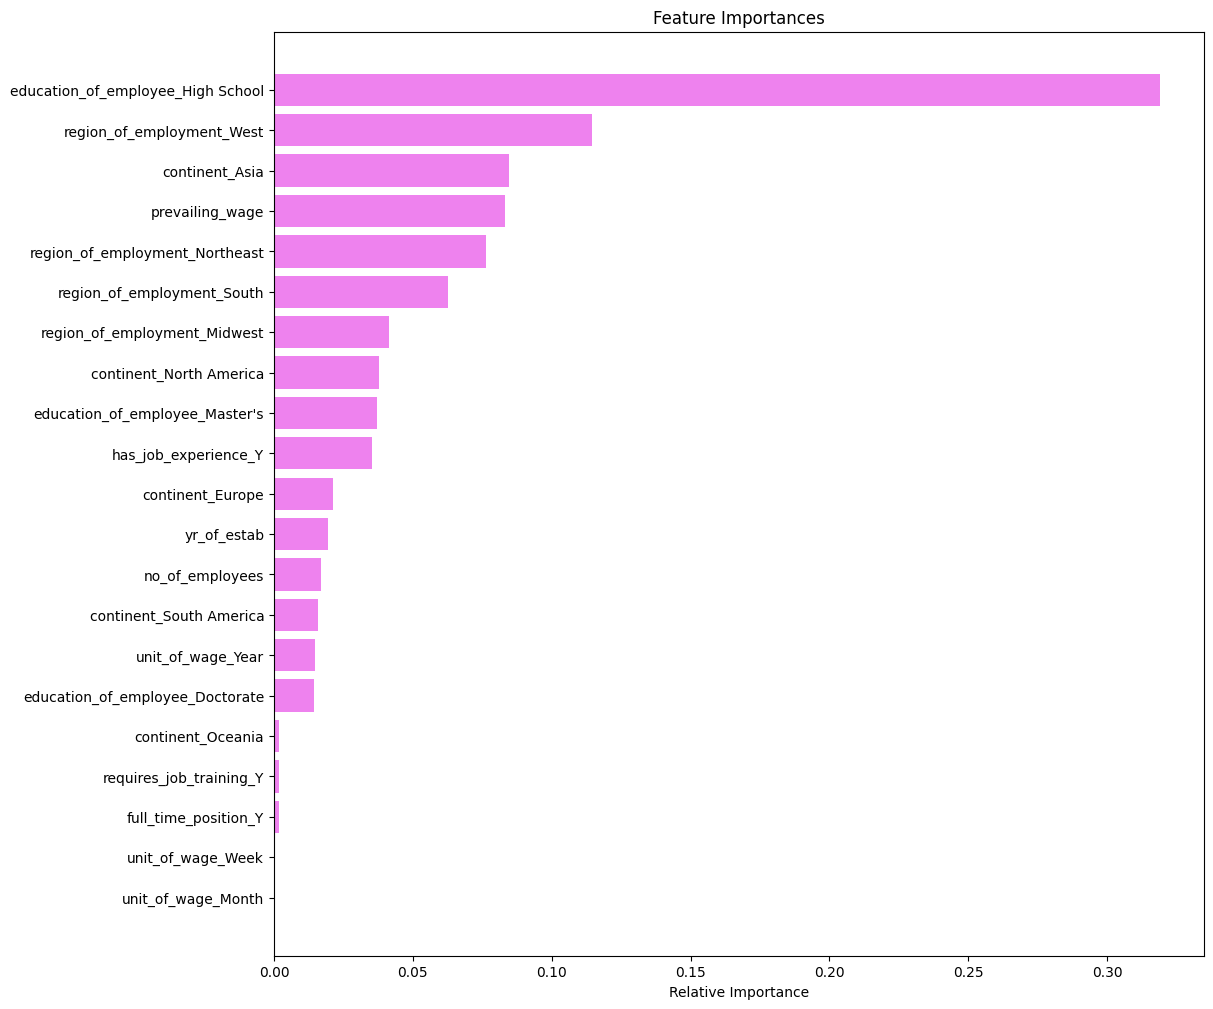

In [ ]:
feature_names = X_train.columns
importances = tuned_gbm.feature_importances_ ## Complete the code to print the feature importances from the best model.
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

Execute Summary



*   **No of Employees** - The presence of outliers exists for very large corporations that could have distinct operational practices, resource allocations, and economic impacts compared to smaller firms.
*  **Year Establish** - the majority of establishments were founded between approximately 1950 and 2000, with the median year situated slightly above 2000

*   **Prevailing Wage** - outliers represent industries or roles with premium compensation, highly specialized positions, and other exceptional circumstances that drive wages upward. Several data points extend well above this threshold, reaching as high as 300,000
*  **Applicants** with Bachelor's degrees (40.2%), followed by those with Master's degrees (37.8%). In contrast, the proportions for Doctorate holders (8.6%) and employees with only High School diplomas (13.4%) are significantly lower

*   The **Northeast region** leads with the highest percentage of employment at 28.2%, indicating a significant concentration of job opportunities in this area
*   A **substantial number** of applicants entering the U.S. workforce under the Immigration and Nationality Act (INA) bring prior job experience

*  The certification rate of **66.8%** demonstrates the INA effectiveness in allowing skilled professionals to join the U.S. workforce
*   Number of Employees vs. Year Established a -0.02 suggests that the size of an organization’s workforce is largely independent of its year of establishment

*   Number of Employees vs. Prevailing Wage -0.01 his finding highlights that organizations, irrespective of their size, adhere to prevailing wage standards mandated by U.S. labor laws
*   Year Established vs. Prevailing Wage correlation of 0.01 suggests that an organization’s age has little to no bearing on the wages it offers

*   Geographic location remains influential in the US, with European employment patterns factoring into the analysis
*   Education Level (High School) – This feature holds the highest importance, indicating that an individual's education level plays a major role in classification outcomes

*   The presence of various features with non-negligible importance indicates that the predictive task depends on a combination of factors rather than a single dominant variable.
*   Prevailing Wage consistently remains a critical factor, aligning with the importance of compliance in visa applications.

*   Yearly Wages applications associated with yearly wages dominate and enjoy the highest certification rates
*   Weekly and Monthly Wages these categories exhibit moderate certification rates

*   List item
*   List item

*   List item
*   List item

*   List item
*   List item



## Actionable Insights and Recommendations
**Insights**<br>
*  Notable percentage of applicants without experience suggests opportunities for
*  Entry-level roles or training programs to integrate these individuals into the workforce effectively


*   The denial rate of **32%** reflects the INA enforcement of stringent eligibility requirements, ensuring that only qualified candidates are approved to enter the workforce.

*   The INA prioritizes other criteria, such as job qualifications, industry needs, and regional demands, to uphold equitable access to the U.S. workforce

*  Best Performer: GBM stands out as the most balanced algorithm, excelling in both training and validation performance, making it ideal for tasks requiring strong generalization.
*   Cross-Validation Performance on the Training Dataset: Adaboost: With the highest score of 0.889 in cross-validation, Adaboost demonstrates exceptional performance in fitting the training data, suggesting its robustness in capturing patterns.


*   Overfitting Risk: Algorithms like Bagging and Decision Tree exhibit overfitting tendencies, making them less suitable for datasets requiring robust validation performance


*   The majority of companies have a relatively small number of employees

*   Like the southern region, employment patterns in the Midwest appear highly relevant

*   Certification Rates by Unit of Wage Year - Certification Rate: 69.9%, Denial Rate: 30.1%


*  The high certification rate aligns with the preference for stable, long-term employment contracts that fulfill INA requirements and not by Hour (747 Certified, 1410 Denied):

*   List item
*   List item


*   List item


*   List item


*   List item





.


<font size=6 color='blue'>Power Ahead</font>
___